# import

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA 
from sklearn.discriminant_analysis import StandardScaler 
from imblearn.over_sampling import SMOTE


# result

all the data

Accuracy: 66.16%

 Training Accuracy score: 0.665268456375839
Testing Accuracy score: 0.661641541038526
classification_report 
               precision    recall  f1-score   support

         0.0       1.00      0.15      0.27       239
         1.0       0.64      1.00      0.78       358

    accuracy                           0.66       597
   macro avg       0.82      0.58      0.52       597
weighted avg       0.78      0.66      0.58       597



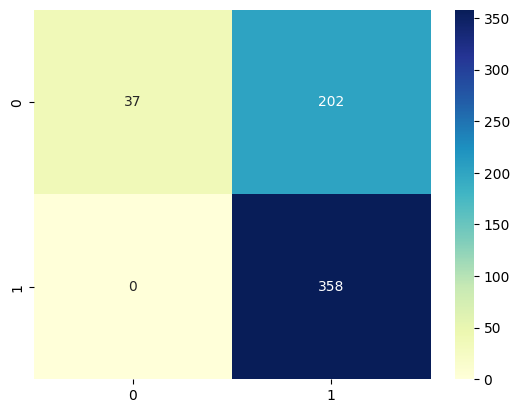

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks
df = pd.read_csv('./Data/cleandata.csv')
# tl = TomekLinks()
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()
# x, y = tl.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

clf= SVC(random_state=42)
clf.fit(x_train,y_train)
score = clf.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
   

- random undersimpling

Accuracy: 57.74%

 Training Accuracy score: 0.5753138075313807
Testing Accuracy score: 0.5774058577405857
classification_report 
               precision    recall  f1-score   support

         0.0       1.00      0.15      0.27       239
         1.0       0.54      1.00      0.70       239

    accuracy                           0.58       478
   macro avg       0.77      0.58      0.49       478
weighted avg       0.77      0.58      0.49       478



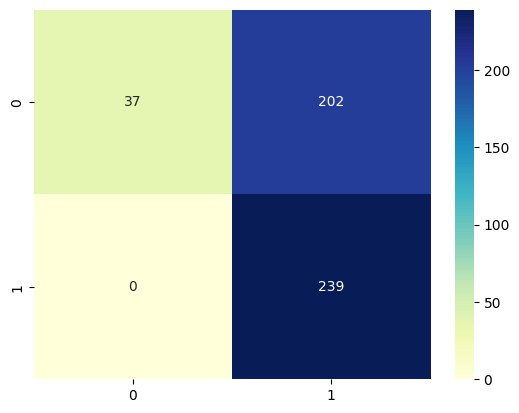

In [7]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

data1 = pd.read_csv('./Data/cleandata.csv')

df1=data1[data1.IsABot== 1].head(1195)
df2=data1[data1.IsABot== 0].head(1195)
df = pd.concat([df1, df2], ignore_index=True)
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
   
    ('rf', SVC(random_state=42)) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)
score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

- random undersimpling + StandardScaler

Accuracy: 79.08%

 Training Accuracy score: 0.7871338912133892
Testing Accuracy score: 0.7907949790794979
classification_report 
               precision    recall  f1-score   support

         0.0       0.86      0.70      0.77       239
         1.0       0.75      0.88      0.81       239

    accuracy                           0.79       478
   macro avg       0.80      0.79      0.79       478
weighted avg       0.80      0.79      0.79       478



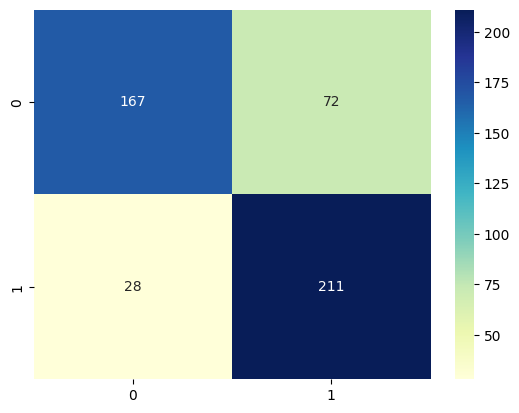

In [8]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
data1 = pd.read_csv('./Data/cleandata.csv')

df1=data1[data1.IsABot== 1].head(1195)
df2=data1[data1.IsABot== 0].head(1195)
df = pd.concat([df1, df2], ignore_index=True)
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf',  SVC(random_state=42)) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)
score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

tomklink undersimpling

Accuracy: 83.99%

 Training Accuracy score: 0.8204134366925064
Testing Accuracy score: 0.8399311531841652
classification_report 
               precision    recall  f1-score   support

         0.0       0.93      0.66      0.77       239
         1.0       0.80      0.96      0.88       342

    accuracy                           0.84       581
   macro avg       0.87      0.81      0.82       581
weighted avg       0.85      0.84      0.83       581



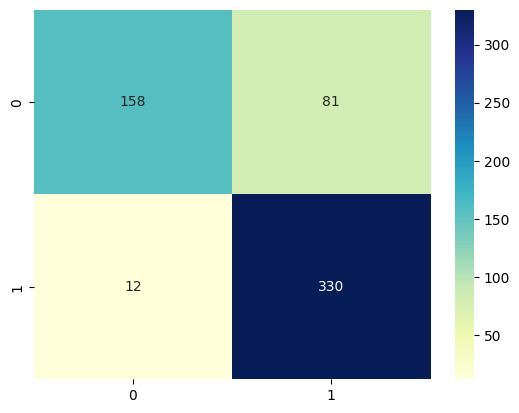

In [9]:
import numpy as np # linear algebra
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks

df = pd.read_csv('./Data/cleandata.csv')

tl = TomekLinks()
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()
x, y = tl.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

clf = Pipeline([
     ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf',  SVC(random_state=42)) # Training a random forest classifier on the data
])

# Train the pipeline on the data
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
   

tomlink + random undersimpling

Accuracy: 83.99%

 Training Accuracy score: 0.8204134366925064
Testing Accuracy score: 0.8399311531841652
classification_report 
               precision    recall  f1-score   support

         0.0       0.93      0.66      0.77       239
         1.0       0.80      0.96      0.88       342

    accuracy                           0.84       581
   macro avg       0.87      0.81      0.82       581
weighted avg       0.85      0.84      0.83       581



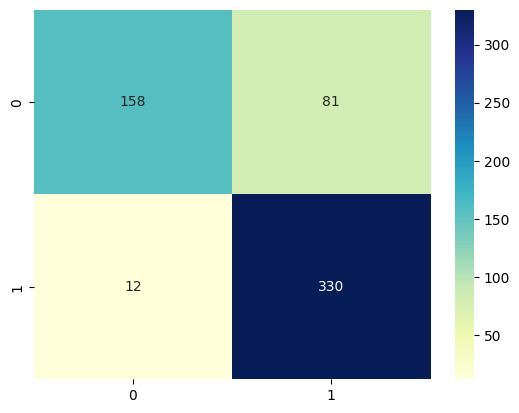

In [10]:
import numpy as np # linear algebra
import pandas as pd
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks
from sklearn.pipeline import Pipeline
df = pd.read_csv('./Data/cleandata.csv')
tl = TomekLinks()
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()

x, y = tl.fit_resample(x, y)
# Convert the list to a DataFrame
y = pd.DataFrame({'IsABot': y})

# Concatenate the two DataFrames
data = pd.concat([x, y], axis=1)
df1=data[data.IsABot== 1].head(11543)
df2=data[data.IsABot== 0].head(11543)
df = pd.concat([df1, df2], ignore_index=True)
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

clf = Pipeline([
     ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf',  SVC(random_state=42)) # Training a random forest classifier on the data
])

# Train the pipeline on the data
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

-oversimpling

Accuracy: 82.52%

 Training Accuracy score: 0.7945397269863493
Testing Accuracy score: 0.8251748251748252
classification_report 
               precision    recall  f1-score   support

         0.0       0.90      0.73      0.81       358
         1.0       0.77      0.92      0.84       357

    accuracy                           0.83       715
   macro avg       0.84      0.83      0.82       715
weighted avg       0.84      0.83      0.82       715



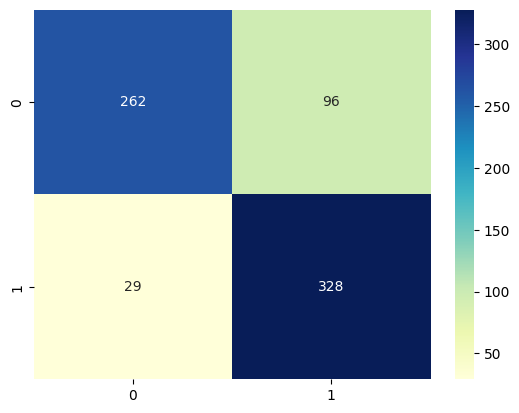

In [11]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
df = pd.read_csv('./Data/cleandata.csv')
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()
smote = SMOTE(random_state=10)
x, y =smote.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf',  SVC(random_state=42)) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)

# feat_importances = pd.Series(pipeline['rf'].feature_importances_, index=x.columns)
# feat_importances.nlargest(20).plot(kind='barh')
# plt.show()
score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

# with features selection

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
data1 = pd.read_csv('./Data/cleandata.csv')
data1=data1.loc[:,['HasProfilePicture', 'following', 'follower',
       'HasAccountDescription', 'likes', 'posts', 'AverageNumberOfHashtags',
       'AverageNumberOfComments', 'AverageNumberOfShare',
       'AverageNumberOfLikes', 'AverageNumberOfLinkedProfiles',
       'AverageNumberOfViews', 'IsABot']]




- random undersimpling 

Accuracy: 79.08%

 Training Accuracy score: 0.7871338912133892
Testing Accuracy score: 0.7907949790794979
classification_report 
               precision    recall  f1-score   support

         0.0       0.86      0.70      0.77       239
         1.0       0.75      0.88      0.81       239

    accuracy                           0.79       478
   macro avg       0.80      0.79      0.79       478
weighted avg       0.80      0.79      0.79       478



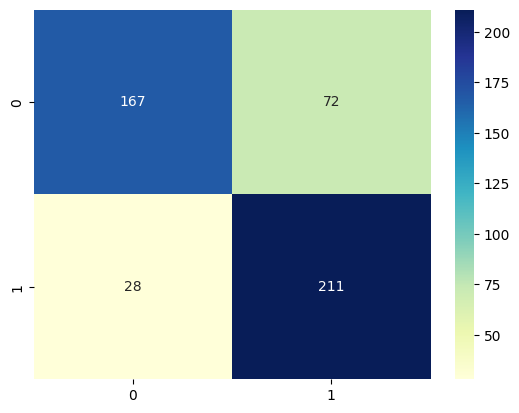

In [13]:
df1=data1[data1.IsABot== 1].head(1195)
df2=data1[data1.IsABot== 0].head(1195)
df = pd.concat([df1, df2], ignore_index=True)
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf',  SVC(random_state=42)) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)

score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

- oversimpling

Accuracy: 82.52%

 Training Accuracy score: 0.7941897094854743
Testing Accuracy score: 0.8251748251748252
classification_report 
               precision    recall  f1-score   support

         0.0       0.90      0.73      0.81       358
         1.0       0.77      0.92      0.84       357

    accuracy                           0.83       715
   macro avg       0.84      0.83      0.82       715
weighted avg       0.84      0.83      0.82       715



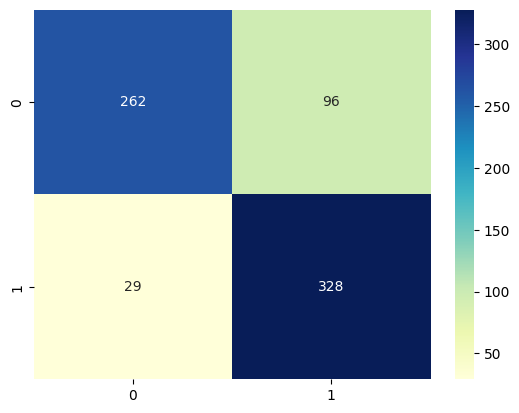

In [14]:
from imblearn.over_sampling import SMOTE
df=data1
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()

smote = SMOTE(random_state=10)
x, y =smote.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
   ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf',  SVC(random_state=42)) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)
score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)
cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

tomklink undersimpling

Accuracy: 84.17%

 Training Accuracy score: 0.8195521102497847
Testing Accuracy score: 0.8416523235800344
classification_report 
               precision    recall  f1-score   support

         0.0       0.93      0.66      0.77       239
         1.0       0.80      0.97      0.88       342

    accuracy                           0.84       581
   macro avg       0.87      0.81      0.83       581
weighted avg       0.86      0.84      0.84       581



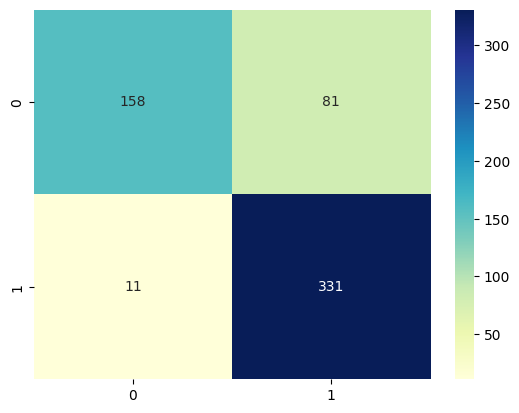

In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks
df=data1
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()
tl = TomekLinks()
x, y = tl.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
clf = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf',  SVC(random_state=42)) # Training a random forest classifier on the data
])

# Train the pipeline on the data
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)

print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
   

# hyperparametre


In [38]:
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import TomekLinks
data1 = pd.read_csv('./Data/cleandata.csv')
data1=data1.loc[:,['HasProfilePicture', 'following', 'follower',
       'HasAccountDescription', 'likes', 'posts', 'AverageNumberOfHashtags',
       'AverageNumberOfComments', 'AverageNumberOfShare',
       'AverageNumberOfLikes', 'AverageNumberOfLinkedProfiles',
       'AverageNumberOfViews', 'IsABot']]

x=data1.iloc[:, :-1]
y = data1.IsABot.values.tolist()
tl = TomekLinks()
x, y = tl.fit_resample(x, y)
# Create a logistic regression pipeline with StandardScaler
param_grid = {
    'mlp__C': [0.1, 1, 10],
    'mlp__kernel': ['linear', 'rbf', 'poly'],
    'mlp__degree': [2, 3, 4],
    'mlp__gamma': ['scale', 'auto'] + [0.1, 1, 10]
}


pipe = Pipeline([
    ('scaler', StandardScaler()),
     ('pca', PCA()),
    ('mlp',SVC())
])
# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=3)
grid_search.fit(x ,y)

grid_search.best_params_

{'mlp__activation': 'relu',
 'mlp__hidden_layer_sizes': (10,),
 'mlp__learning_rate': 'constant',
 'mlp__solver': 'adam'}

#  cross validation

smote oversampling

In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score

data1 = pd.read_csv('./Data/cleandata.csv')
data1=data1.loc[:,['HasProfilePicture', 'following', 'follower',
       'HasAccountDescription', 'likes', 'posts', 'AverageNumberOfHashtags',
       'AverageNumberOfComments', 'AverageNumberOfShare',
       'AverageNumberOfLikes', 'AverageNumberOfLinkedProfiles',
       'AverageNumberOfViews', 'IsABot']]

x=data1.iloc[:, :-1]
y = data1.IsABot.values.tolist()
smote = SMOTE(random_state=10)
x, y =smote.fit_resample(x, y)
k_folds = KFold(n_splits = 10)
clf = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf',  SVC(random_state=42)) # Training a random forest classifier on the data
])

scores = cross_val_score(clf, x, y, cv = k_folds)

print("Average CV Score: ", scores.mean())
# Average CV Score:  0.7905747773969923

Average CV Score:  0.7905747773969923


tomeklink undersampling

In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score

data1 = pd.read_csv('./Data/cleandata.csv')
data1=data1.loc[:,['HasProfilePicture', 'following', 'follower',
       'HasAccountDescription', 'likes', 'posts', 'AverageNumberOfHashtags',
       'AverageNumberOfComments', 'AverageNumberOfShare',
       'AverageNumberOfLikes', 'AverageNumberOfLinkedProfiles',
       'AverageNumberOfViews', 'IsABot']]

x=data1.iloc[:, :-1]
y = data1.IsABot.values.tolist()
tl = TomekLinks()
x, y = tl.fit_resample(x, y)
k_folds = KFold(n_splits = 10)
clf = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf',  SVC(random_state=42)) # Training a random forest classifier on the data
])

scores = cross_val_score(clf, x, y, cv = k_folds)

print("Average CV Score: ", scores.mean())
# Average CV Score:  0.819824623770589

Average CV Score:  0.819824623770589
